# Introduction to pyTorch

### Graduating from ndarrays to tensors
### Visualize linear transformations
### Linear and non-linear transformations using pyTorch
### Use AutoGrad to compute the gradient

In [140]:
import torch

In [ ]:
torch.sq # Tab (inteli-sense)

In [ ]:
torch.*Tensor? #What all are there?

In [ ]:
torch.nn.Module() #shift + Tab -> Documentation of the func

In [ ]:
torch.nn.Module?
torch.nn.Module??  # the underlying code 

### Let's start with tensors

In [101]:
t = torch.Tensor(2,3,4)
type(t) # what is my datatype ? how many bytes?

torch.FloatTensor

In [102]:
t.size()

torch.Size([2, 3, 4])

In [103]:
t.numel() # in a max of 24 dimensional space = 2 x 3 x 4

24

In [104]:
t.dim() # returns sub-dimensions

3

In [105]:
t # see the last line of the output below


(0 ,.,.) = 
  0.0000e+00 -1.5846e+29  2.8254e+16 -2.8601e-42
  8.4078e-45  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  1.8754e+28  1.2870e+22

(1 ,.,.) = 
  4.1727e+21  1.0471e-11  2.1124e+20  1.0524e+21
  6.6756e+22  6.3075e-10  1.7471e-04  6.9062e-07
  5.1436e-11  7.1450e+31  4.1418e-41  5.5101e-40
[torch.FloatTensor of size 2x3x4]

In [106]:
# _ "The" most imp concept, if you are deep learning aspirant
#_ -> inplace operation
t.random_(5)


(0 ,.,.) = 
  0  4  1  1
  2  1  4  0
  1  0  2  4

(1 ,.,.) = 
  0  2  1  2
  1  3  4  3
  2  4  1  4
[torch.FloatTensor of size 2x3x4]

In [107]:
#  now if say
r = t.resize_(3,8)
r


    0     4     1     1     2     1     4     0
    1     0     2     4     0     2     1     2
    1     3     4     3     2     4     1     4
[torch.FloatTensor of size 3x8]

In [108]:
t


    0     4     1     1     2     1     4     0
    1     0     2     4     0     2     1     2
    1     3     4     3     2     4     1     4
[torch.FloatTensor of size 3x8]

In [109]:
# see imp. as r points to t, hence in DL we won't overflow the in-memory/RAM
# by creating copies of data on memory
s =r.clone()

In [110]:
s.fill_(1)


    1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1
    1     1     1     1     1     1     1     1
[torch.FloatTensor of size 3x8]

In [111]:
# Sometimes good to have copies, if we want to go back to prev. state
t # see didn't change


    0     4     1     1     2     1     4     0
    1     0     2     4     0     2     1     2
    1     3     4     3     2     4     1     4
[torch.FloatTensor of size 3x8]

In [112]:
r.zero_()


    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
[torch.FloatTensor of size 3x8]

In [113]:
t # see it changed!


    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
    0     0     0     0     0     0     0     0
[torch.FloatTensor of size 3x8]

### Tensor- Vectors (1D Tensor)

In [114]:
v = torch.Tensor([1, 2, 3, 4]);v


 1
 2
 3
 4
[torch.FloatTensor of size 4]

In [115]:
v.dim()

1

In [116]:
v.numel()

4

In [160]:
w = torch.Tensor([1,0,2,0]); w


 1
 0
 2
 0
[torch.FloatTensor of size 4]

In [162]:
v * w


 1
 0
 6
 0
[torch.FloatTensor of size 4]

In [161]:
v @ w

0.0

In [125]:
x = torch.Tensor(5).random_(5); x


 0
 3
 4
 1
 4
[torch.FloatTensor of size 5]

In [127]:
print(x[0], x[-1]) # 1st & last

0.0 4.0


In [130]:
x[0:2] # always range -1


 0
 3
[torch.FloatTensor of size 2]

In [138]:
y = torch.arange(1,4);y # Use shift+Tab to see what is arange


 1
 2
 3
[torch.FloatTensor of size 3]

### Tensor Matrices (2D Tensors)

In [141]:
m = torch.Tensor([[2, 5, 3, 7],
                  [4, 2, 1, 9]]); m


 2  5  3  7
 4  2  1  9
[torch.FloatTensor of size 2x4]

In [148]:
print(m.dim(), m.numel(), m.size()[0], m.size()[1], sep=", ")

2, 8, 2, 4


In [154]:
print(m[0,2], m[0][2]) # accessing an element, use either way

3.0 3.0


In [153]:
print(m[:,1])


 5
 2
[torch.FloatTensor of size 2]



In [156]:
print(m[:,[1]]) # note the type, last line


 5
 2
[torch.FloatTensor of size 2x1]



In [157]:
m @ v 
# 2*1 + 5*2 + 3*3 +7*4 
# 4*1 + 2*2 + 1*3 + 9*4


 49
 47
[torch.FloatTensor of size 2]

In [167]:
m+ torch.rand(2,4)


 2.1196  5.6785  3.5755  7.0629
 4.4850  2.9443  1.8896  9.1045
[torch.FloatTensor of size 2x4]

In [169]:
m.t() # transpose


 2  4
 5  2
 3  1
 7  9
[torch.FloatTensor of size 4x2]

In [196]:
torch.eye(3) #identity matrix


 1  0  0
 0  1  0
 0  0  1
[torch.FloatTensor of size 3x3]

In [197]:
torch.ones(3,5)


 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
[torch.FloatTensor of size 3x5]

In [199]:
torch.arange(3,5)


 3
 4
[torch.FloatTensor of size 2]

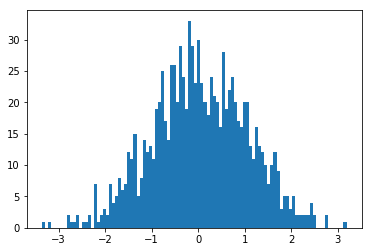

In [192]:
%matplotlib inline
from matplotlib import pyplot as plt
# Numpy bridge!
plt.hist(torch.randn(1000).numpy(), 100); # randn returns tensor filled with random from uniform distribution

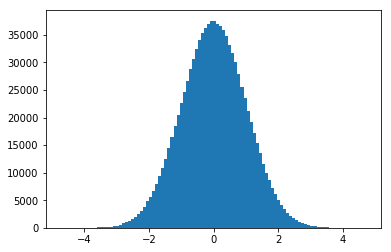

In [187]:
plt.hist(torch.randn(10**6).numpy(), 100);  # how much does this chart weight?
# use rasterized=True for SVG/EPS/PDF! 

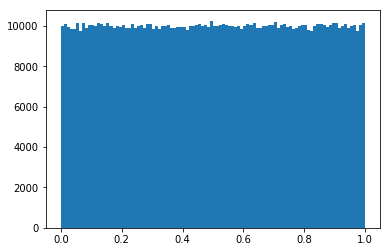

In [200]:
plt.hist(torch.rand(10**6).numpy(), 100); # rand returns tensor filled with random numbers from uniform distribution

In [211]:
if torch.cuda.is_available(): # if you have gpu, delegate the task to it
    m.cuda()

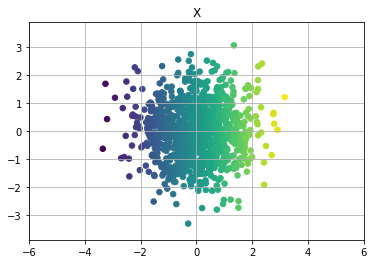

In [224]:
def show_scatterplot(X, norm=True, title=''):
    X = X.numpy()
    plt.figure()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=p_size)
    if norm:
        plt.xlim(-6, 6)
        plt.ylim(-6, 6)
    plt.grid(True)
    plt.title(title)

# generate some points in 2-D space
n_points = 1000
p_size = 30
X = torch.randn(n_points, 2) 
colors = X[:, 0].numpy() 

show_scatterplot(X, norm=True, title='X')

### Visualize linear transformations
* Generate a random matrix $W$

$
\begin{equation}
    W = U
  \left[ {\begin{array}{cc}
   s_1 & 0 \\
   0 & s_2 \\
  \end{array} } \right]
  V^\top
\end{equation}
$
* Compute $y = Wx$
* Larger singular values stretch the points
* Smaller singular values push them together
* $U, V$ rotate/reflect

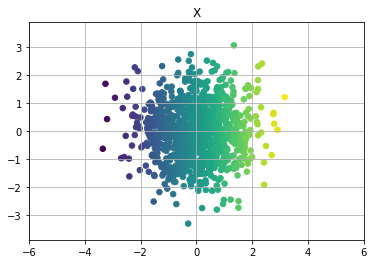

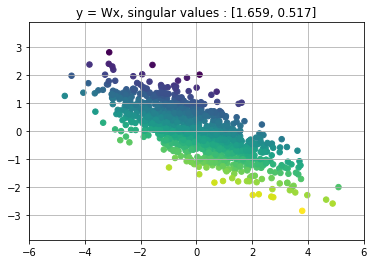

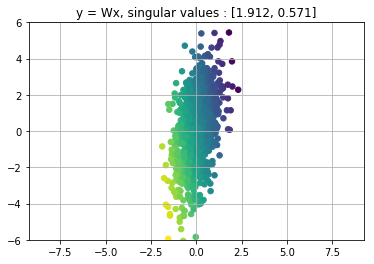

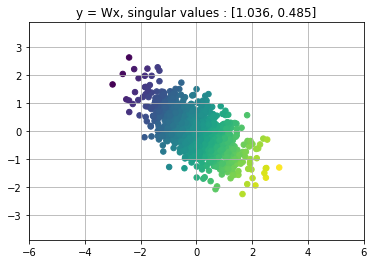

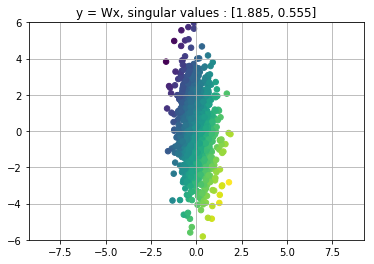

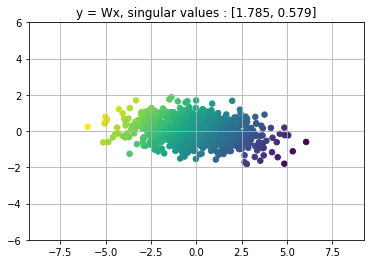

In [230]:
show_scatterplot(X, norm=True, title='X')

for i in range(5):
    # create a random matrix
    W = torch.randn(2, 2)
    # transform points
    Y = torch.mm(X, W)  # matrix multiplication X*W
    # compute singular values
    U,S,V = torch.svd(W)
    # plot
    show_scatterplot(Y, norm=True, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))

### Linear transformation with pyTorch

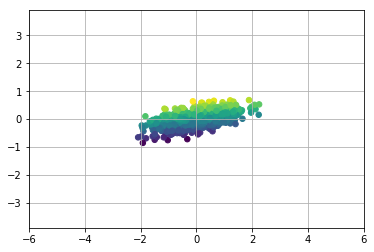

In [264]:
from torch import nn
from torch.autograd import Variable
model = nn.Sequential(
         nn.Linear(2, 2, bias=False))
Y = model(Variable(X)).data
show_scatterplot(Y)

# Non-linear Transform: Map Points to a Square

* Linear transforms can rotate, reflect, stretch and compress, but cannot curve
* We need non-linearities for this
* Can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with a tanh function

$
   f(x)= \tanh \left(
  \left[ {\begin{array}{cc}
   s & 0 \\
   0 & s \\
  \end{array} } \right]  
  x
  \right)
$

Text(0.5,1,'tanh() non linearity')

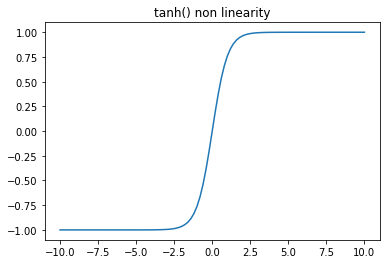

In [256]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plt.plot(z.numpy(), s.numpy())
plt.title('tanh() non linearity')

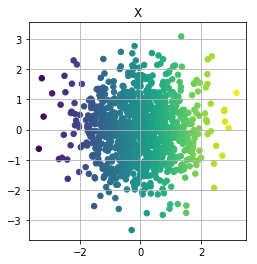

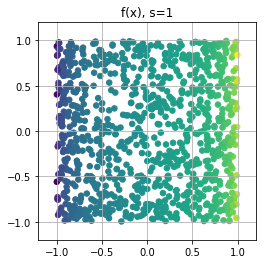

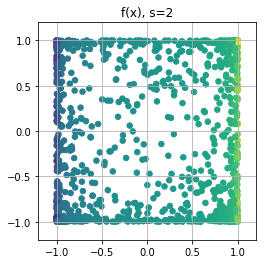

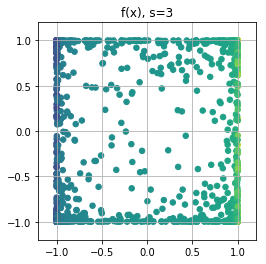

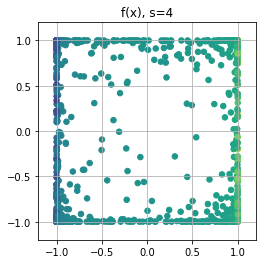

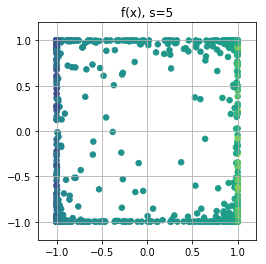

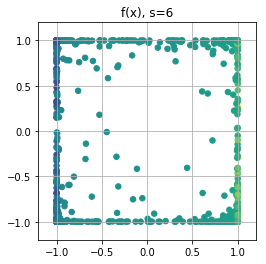

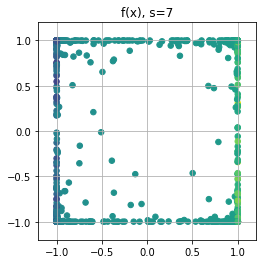

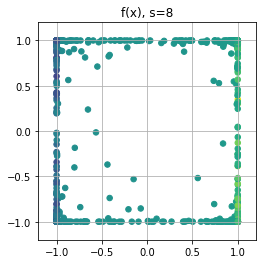

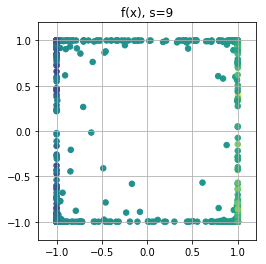

In [257]:
show_scatterplot(X, title='X')
plt.axis('square')

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
    )

for s in range(1, 10):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(Variable(X)).data
    show_scatterplot(Y, False, title='f(x), s={}'.format(s))
    plt.axis('square')
    plt.axis([-1.2, 1.2, -1.2, 1.2])

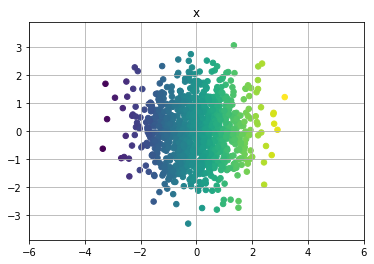

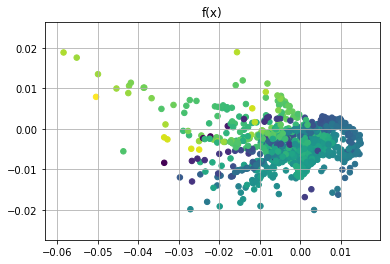

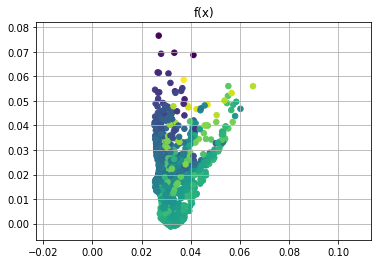

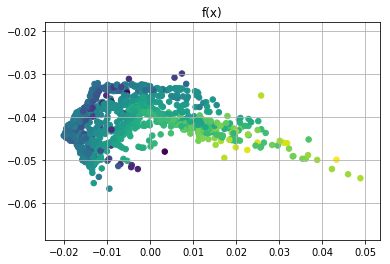

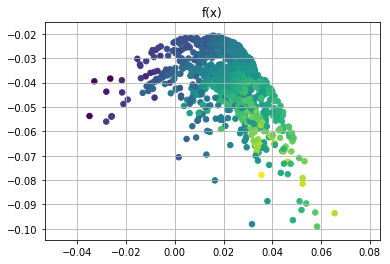

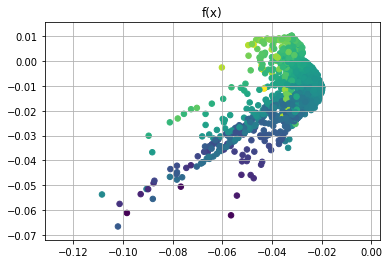

In [265]:
# deeper network with random weights
show_scatterplot(X, title='x')
n_hidden = 1000

for i in range(5):
    model_2layer = nn.Sequential(
        nn.Linear(2, n_hidden, bias=True), 
        nn.ReLU(), 
        nn.Linear(n_hidden, n_hidden, bias=True), 
        nn.ReLU(), 
        nn.Linear(n_hidden, n_hidden, bias=True), 
        nn.ReLU(), 
        nn.Linear(n_hidden, n_hidden, bias=True), 
        nn.ReLU(), 
        nn.Linear(n_hidden, 2, bias=True)
    )
    Y = model_2layer(Variable(X)).data
    show_scatterplot(Y, False, title='f(x)')



# Autograd: automatic differentiation

The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

In [295]:
import torch
from torch.autograd import Variable # Read doc what a Variable does
from torch import optim
import torch.nn.functional as F

In [268]:
x = Variable(torch.Tensor([[1, 2], [3, 4]]), requires_grad=True)
print(x)

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]



In [278]:
y =x -2;y

Variable containing:
-1  0
 1  2
[torch.FloatTensor of size 2x2]

In [271]:
z = torch.Tensor([[1, 2], [3, 4]])

In [274]:
a = z-2;a


-1  0
 1  2
[torch.FloatTensor of size 2x2]

In [281]:
print(y.grad_fn) # y was created as a result of an operation, so it has a grad_fn.

In [280]:
print(a.grad_fn)

AttributeError: 'torch.FloatTensor' object has no attribute 'grad_fn'

In [282]:
print(x.grad_fn)

None


In [284]:
y.grad_fn.next_functions[0][0]

In [285]:
y.grad_fn.next_functions[0][0].variable

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]

In [286]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
  3   0
  3  12
[torch.FloatTensor of size 2x2]
 Variable containing:
 4.5000
[torch.FloatTensor of size 1]



Gradients
---------
let's backprop now
``out.backward()`` is equivalent to doing ``out.backward(torch.Tensor([1.0]))``


In [288]:
out.backward()

print gradients d(out)/dx

In [289]:
print(x.grad)

Variable containing:
-1.5000  0.0000
 1.5000  3.0000
[torch.FloatTensor of size 2x2]



# Let's build basic model:
* Construct a model $f(x)$ with parameters $\theta$
* Train it to learn a simple function $y = x^2$ by gradient descent
* We do this by minimizing a loss function $\mathcal{L}(\theta) = \|x_i^2 - f(x_i) \|$ for many random points $x_i$ 
* Visualize the function that it learns


Gradient descent works as follows:

* Randomly initialize model parameters $\theta$
* Repeat: $\theta_{t+1} \leftarrow \theta_t - \alpha \frac{\partial \mathcal{L}}{\partial \theta}$

### Initialize the model

Text(0,0.5,'y')

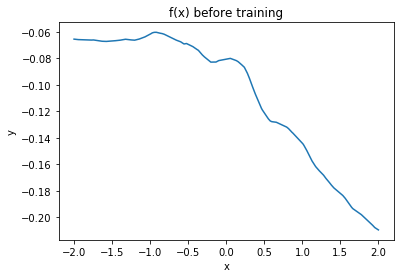

In [290]:
n_hidden = 100
model = nn.Sequential(
        nn.Linear(1, n_hidden), 
        nn.ReLU(), 
        nn.Linear(n_hidden, n_hidden), 
        nn.ReLU(), 
        nn.Linear(n_hidden, 1)
        )

x = Variable(torch.linspace(-2, 2, 1000).view(-1, 1))
y = model(x)
plt.plot(x.data.squeeze().numpy(), y.data.squeeze().numpy())
plt.title('f(x) before training')
plt.xlabel('x')
plt.ylabel('y')

### Train the Model

* Sample random points $x_i \in [-2, 2]$
* Minimize network weights with respect to $\mathcal{L}(\theta) = \sum_i \|x_i^2 - f(x_i) \|$ 

Text(0,0.5,'loss')

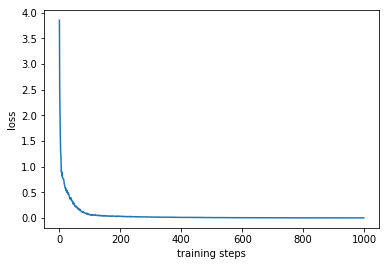

In [296]:
learning_rate = 0.01
batch_size = 1000
optimizer = optim.SGD(model.parameters(), learning_rate)
loss = []
for t in range(1000):
    model.zero_grad()
    # sample points in [-2, 2]
    x = 4*(torch.rand(batch_size, 1) - 0.5)
    x = Variable(x.view(-1, 1))
    y = model(x)
    current_loss = F.mse_loss(y, x**2)
    current_loss.backward()
    optimizer.step()
    loss.append(current_loss.data[0])
    
plt.plot(loss)
plt.xlabel('training steps')
plt.ylabel('loss')